In [1]:
#importaciones de las librerias
import pandas as pd
import numpy as np
import sklearn as sl
import matplotlib.pyplot as pl

In [2]:
df=pd.read_csv("vacunaciones.csv")#Leemos el fichero csv

In [3]:
df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3203,Wales,NaN,2021-02-10,687892.0,684097.0,3795.0,28786.0,28015.0,21.82,21.70,0.12,8886.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3204,Wales,NaN,2021-02-11,719954.0,715944.0,4010.0,32062.0,27897.0,22.83,22.71,0.13,8848.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3205,Wales,NaN,2021-02-12,753669.0,749445.0,4224.0,33715.0,27743.0,23.90,23.77,0.13,8799.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3206,Wales,NaN,2021-02-13,776224.0,771651.0,4573.0,22555.0,26285.0,24.62,24.47,0.15,8337.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...


In [4]:
#for que itera el dataframa
for x in range(0,len(df.index)):
    #inicilizamos las variable
    mean=0
    rows=0
    #condicion para cuando el valor sea nan
    if(np.isnan(df['people_vaccinated'][x])):
        #comprobamos nan en fila 3 anteriores
        if (x-3>=0):
            if(df['country'][x-3]==df['country'][x]):
                rows=rows+1
                mean+=df['people_vaccinated'][x-3]
        #comprobamos nan en fila 2 anteriores
        elif (x-2>=0):
            if(df['country'][x-2]==df['country'][x]):
                rows=rows+1
                mean+=df['people_vaccinated'][x-2]
        #comprobamos nan en fila 2 anteriores
        elif (x-1>=0):
            if(df['country'][x-1]==df['country'][x]):
                rows=rows+1
                mean+=df['people_vaccinated'][x-1]
        #En el caso de que los 3 valores anteriores sean null
        #se asignara el valor de 0.0
        #En caso contrario se realizara la media
        if(rows==0):
            df['people_vaccinated'][x]=0.0
        else:
            df['people_vaccinated'][x]=mean/rows

<ipython-input-4-0fc2269c7796>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['people_vaccinated'][x]=mean/rows
<ipython-input-4-0fc2269c7796>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['people_vaccinated'][x]=0.0


In [5]:
print(df.iloc[:,4]) #imprimimos los valores de la columna correspondiente

0            0.0
1            0.0
2          128.0
3          188.0
4          266.0
          ...   
3203    684097.0
3204    715944.0
3205    749445.0
3206    771651.0
3207    784809.0
Name: people_vaccinated, Length: 3208, dtype: float64


In [6]:
NumCrim3=df.groupby(['country'])['date'].count()
NumCrim2 = pd.DataFrame(NumCrim3)
NumCrim2

,date
country,
Albania,31
Algeria,2
Andorra,17
Anguilla,10
Argentina,49
...,...
Turks and Caicos Islands,30
United Arab Emirates,42
United Kingdom,64


In [7]:
by_date = NumCrim2.sort_values('date',ascending=False)
by_date.head()

,date
country,
Wales,64
England,64
Scotland,64
Northern Ireland,64
United Kingdom,64


<AxesSubplot:xlabel='country'>

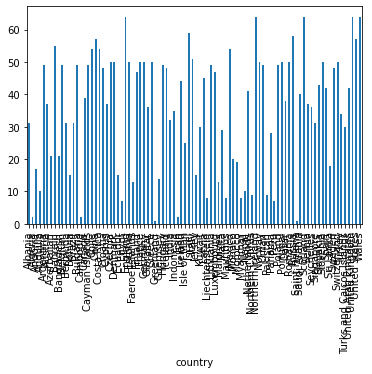

In [8]:
df.groupby(['country'])['date'].count().plot(kind='bar')

In [28]:
#Guardamos en un dataframe los paises que mas han vacunado, un dataframe para cada pais
#Como hemos visto en el dataframe anterior
Wales_data = df[df["country"] == "Wales"]
England_data = df[df["country"] == "England"]
Scotland_data = df[df["country"] == "Scotland"]
NorthernIreland_data = df[df["country"] == "Northern Ireland"]
UnitedKingdom_data = df[df["country"] == "United Kingdom"]

In [24]:
#Unimos todos los dataframes en uno
Datatotal=Wales_data.append(England_data, ignore_index=True)
Datatotal=Datatotal.append(Scotland_data, ignore_index=True)
Datatotal=Datatotal.append(NorthernIreland_data, ignore_index=True)
Datatotal=Datatotal.append(UnitedKingdom_data, ignore_index=True)
Datatotal

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Wales,NaN,2020-12-13,8207.0,8207.0,NaN,NaN,NaN,0.26,0.26,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
1,Wales,NaN,2020-12-14,NaN,0.0,NaN,NaN,2223.0,NaN,NaN,NaN,705.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
2,Wales,NaN,2020-12-15,NaN,0.0,NaN,NaN,2223.0,NaN,NaN,NaN,705.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3,Wales,NaN,2020-12-16,NaN,8207.0,NaN,NaN,2223.0,NaN,NaN,NaN,705.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
4,Wales,NaN,2020-12-17,NaN,0.0,NaN,NaN,2223.0,NaN,NaN,NaN,705.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,United Kingdom,GBR,2021-02-10,14033555.0,13509108.0,524447.0,455704.0,434444.0,20.67,19.90,0.77,6400.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
316,United Kingdom,GBR,2021-02-11,14542318.0,14012224.0,530094.0,508763.0,437897.0,21.42,20.64,0.78,6450.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
317,United Kingdom,GBR,2021-02-12,15091696.0,14556827.0,534869.0,549378.0,445204.0,22.23,21.44,0.79,6558.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
318,United Kingdom,GBR,2021-02-13,15599904.0,15062189.0,537715.0,508208.0,439024.0,22.98,22.19,0.79,6467.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...


In [26]:
#Seleccionamos las columnas 
Datatotal=Datatotal[['country','date','people_vaccinated']]

In [31]:
#Guardamos en un dataframe los paises que mas han vacunado, un dataframe para cada pais
#Como hemos visto en el dataframe anterior
Wales_data = df[df["country"] == "Wales"]
England_data = df[df["country"] == "England"]
Scotland_data = df[df["country"] == "Scotland"]
NorthernIreland_data = df[df["country"] == "Northern Ireland"]
UnitedKingdom_data = df[df["country"] == "United Kingdom"]

In [37]:
Wales_data['date']=pd.to_datetime(Wales_data['date'],dayfirst=True)
var_x=Wales_data[['date']]
y_wales=Wales_data[['people_vaccinated']]
y_England=England_data[['people_vaccinated']]
y_Scotland=Scotland_data[['people_vaccinated']]
y_NorthernIreland=NorthernIreland_data[['people_vaccinated']]
y_UnitedKingdom=UnitedKingdom_data[['people_vaccinated']]


<ipython-input-37-0a072c8ff8d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Wales_data['date']=pd.to_datetime(Wales_data['date'],dayfirst=True)


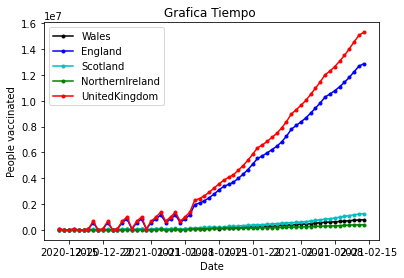

In [45]:
pl.plot(var_x,y_wales,'k',label='Wales',marker='.')
pl.plot(var_x,y_England,'b',label='England',marker='.')
pl.plot(var_x,y_Scotland,'c',label='Scotland',marker='.')
pl.plot(var_x,y_NorthernIreland,'g',label='NorthernIreland',marker='.')
pl.plot(var_x,y_UnitedKingdom,'r',label='UnitedKingdom',marker='.')

pl.xlabel('Date')
pl.ylabel('People vaccinated')
pl.title('Grafica Tiempo ')
pl.legend()
pl.show()
#Hemos utilizado un diagrama de lineas
#Hemos optado por un diagrama de lineas dado que es la mejor forma de valorar la consistencia a lo largo del tiempo de los diferentes paises